In [28]:
import sys
import importlib
sys.path.append('../')

from IPython.display import display, Math, Latex

# From data_preparation classes
from src.finance_ml.data_preparation.data_preparation import DataLoader

from src.finance_ml.denoising.denoising import Denoising
from src.finance_ml.indicators.indicators import Indicators
from src.finance_ml.volatility.volatility import Volatility

# Import required packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math

In [29]:
data=np.random.normal(0, 1, size=(100,50))

In [30]:
data

array([[ 1.35565992e+00,  3.90925765e-01,  1.67372675e-01, ...,
        -8.75864142e-04,  1.07378472e+00, -1.08377523e+00],
       [-2.10554877e+00, -8.73376500e-01, -1.99649948e-02, ...,
        -6.37577693e-03, -1.15722982e+00, -1.13619512e-01],
       [ 1.88194016e+00,  4.21828457e-01, -2.30922655e+00, ...,
        -1.99749754e-01,  5.70417147e-01,  2.12603486e+00],
       ...,
       [-8.45875698e-01,  2.99336110e+00, -1.06127576e+00, ...,
        -7.33439049e-01,  1.62579147e+00, -2.82056674e-01],
       [ 1.59835821e+00,  1.59425441e+00, -1.82958447e+00, ...,
        -1.07301725e+00,  6.27782153e-01,  8.29306328e-01],
       [ 4.87335307e-01,  2.08426104e-01, -1.46420938e+00, ...,
         1.11430835e-01,  1.85209711e-01, -4.38738654e-01]])

In [31]:
# Instanciate the Denoising transformer
# 'fit_transform()' calculates Correlation, Covariance, EigenValues and 
#     EigenVectors of denoised covariance matrix
denoise_processor = Denoising(detoning=False)

denoised_obj = denoise_processor.run_denoising(data)

In [32]:
# Instanciate the Denoising transformer
# 'fit_transform()' calculates Correlation, Covariance, EigenValues and 
#     EigenVectors of denoised covariance matrix
denoise_processor_shrinkage = Denoising(method='shrinkage',detoning=False,alpha=0.5)

denoised_obj_shrinkage = denoise_processor_shrinkage.run_denoising(data)

In [33]:
original_eval=np.diag(denoised_obj_shrinkage.get_eval_original)
constant_eval=np.diag(denoised_obj.get_eval_denoised)
shrinkage_eval=np.diag(denoised_obj_shrinkage.get_eval_denoised)

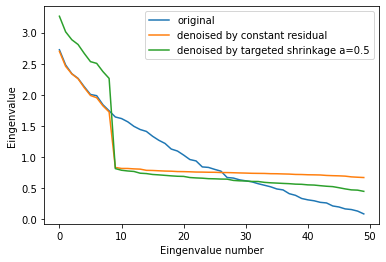

In [37]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting
plt.plot(original_eval, label='original')
plt.plot(constant_eval, label='denoised by constant residual')
plt.plot(shrinkage_eval, label='denoised by targeted shrinkage a=0.5')

# Add labels and title
plt.xlabel('Eingenvalue number')
plt.ylabel('Eingenvalue')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [12]:
constant_eval

array([2.55048007, 2.42761989, 2.37001671, 2.27687353, 2.04453838,
       1.9839099 , 1.85734869, 1.82322202, 1.77579412, 1.70705147,
       0.83637638, 0.82651141, 0.81911562, 0.80478156, 0.79550027,
       0.7931238 , 0.78211329, 0.77906617, 0.77231401, 0.76538703,
       0.757645  , 0.75305848, 0.74917992, 0.74361704, 0.74050831,
       0.7371448 , 0.73430763, 0.73006623, 0.72685474, 0.72347163,
       0.72032373, 0.7181965 , 0.71473102, 0.71121122, 0.70791916,
       0.70694436, 0.70477137, 0.70204573, 0.69891763, 0.69606783,
       0.6923949 , 0.68964383, 0.68583623, 0.68450396, 0.67912845,
       0.67417942, 0.66926446, 0.66565552, 0.65697308, 0.63429345])

In [17]:
shrinkage_eval

array([2.84131727, 2.74764537, 2.6880835 , 2.55107115, 2.35566485,
       2.28781674, 2.16034173, 2.12672301, 2.05720457, 2.0074139 ,
       1.14390167, 1.11312869, 1.07082833, 1.05756073, 1.0020783 ,
       0.9649474 , 0.93510973, 0.9100781 , 0.89883773, 0.86303531,
       0.85582318, 0.82782545, 0.77711729, 0.75660612, 0.7356082 ,
       0.71172506, 0.67832455, 0.67220721, 0.6305267 , 0.61629867,
       0.60269387, 0.59739706, 0.57654067, 0.55487601, 0.53374363,
       0.5100029 , 0.49705174, 0.48636158, 0.46154776, 0.44545191,
       0.43178571, 0.41327879, 0.39922594, 0.38617792, 0.36901573,
       0.36357129, 0.35839119, 0.33807589, 0.32871047, 0.30124941])

In [5]:
# Retrieves non-denoised Covariance and Correlation Matrices
cov0 = denoised_obj.get_cov_original
corr0 = denoised_obj.get_corr_original
corr1 = denoised_obj.get_corr_denoised
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [6]:
cov0

array([[0.925245, 0.994084, -0.609970, 0.591743, -0.227223, -0.445433],
       [0.994084, 1.740945, -0.936179, 0.389901, -0.208937, -0.124189],
       [-0.609970, -0.936179, 0.641247, -0.498336, 0.161369, 0.403415],
       [0.591743, 0.389901, -0.498336, 1.073433, -0.094156, -0.748708],
       [-0.227223, -0.208937, 0.161369, -0.094156, 0.123035, 0.205231],
       [-0.445433, -0.124189, 0.403415, -0.748708, 0.205231, 1.080235]])

In [7]:
corr0

array([[1.000000, 0.783254, -0.791894, 0.593768, -0.673459, -0.445548],
       [0.783254, 1.000000, -0.886041, 0.285217, -0.451449, -0.090559],
       [-0.791894, -0.886041, 1.000000, -0.600650, 0.574505, 0.484708],
       [0.593768, 0.285217, -0.600650, 1.000000, -0.259088, -0.695290],
       [-0.673459, -0.451449, 0.574505, -0.259088, 1.000000, 0.562951],
       [-0.445548, -0.090559, 0.484708, -0.695290, 0.562951, 1.000000]])

In [8]:
corr1

array([[1.000000, 0.581350, -0.628439, 0.559467, -0.570679, -0.539324],
       [0.581350, 1.000000, -0.583758, 0.519690, -0.530105, -0.500979],
       [-0.628439, -0.583758, 1.000000, -0.561785, 0.573043, 0.541557],
       [0.559467, 0.519690, -0.561785, 1.000000, -0.510151, -0.482121],
       [-0.570679, -0.530105, 0.573043, -0.510151, 1.000000, 0.491783],
       [-0.539324, -0.500979, 0.541557, -0.482121, 0.491783, 1.000000]])

In [9]:
# Instanciate the Denoising transformer
# 'fit_transform()' calculates Correlation, Covariance, EigenValues and 
#     EigenVectors of denoised covariance matrix
denoise_processor = Denoising(detoning=True,market_component=2)

detoned_and_denoised_obj = denoise_processor.run_denoising(data)

In [10]:
# Retrieves non-denoised Covariance and Correlation Matrices
detoned_and_denoised_cov0 = detoned_and_denoised_obj.get_cov_original
detoned_and_denoised_corr0 = detoned_and_denoised_obj.get_corr_original
detoned_and_denoised_corr1 = detoned_and_denoised_obj.get_corr_denoised
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [11]:
detoned_and_denoised_cov0

array([[0.925245, 0.994084, -0.609970, 0.591743, -0.227223, -0.445433],
       [0.994084, 1.740945, -0.936179, 0.389901, -0.208937, -0.124189],
       [-0.609970, -0.936179, 0.641247, -0.498336, 0.161369, 0.403415],
       [0.591743, 0.389901, -0.498336, 1.073433, -0.094156, -0.748708],
       [-0.227223, -0.208937, 0.161369, -0.094156, 0.123035, 0.205231],
       [-0.445433, -0.124189, 0.403415, -0.748708, 0.205231, 1.080235]])

In [12]:
detoned_and_denoised_corr0

array([[1.000000, 0.783254, -0.791894, 0.593768, -0.673459, -0.445548],
       [0.783254, 1.000000, -0.886041, 0.285217, -0.451449, -0.090559],
       [-0.791894, -0.886041, 1.000000, -0.600650, 0.574505, 0.484708],
       [0.593768, 0.285217, -0.600650, 1.000000, -0.259088, -0.695290],
       [-0.673459, -0.451449, 0.574505, -0.259088, 1.000000, 0.562951],
       [-0.445548, -0.090559, 0.484708, -0.695290, 0.562951, 1.000000]])

In [13]:
detoned_and_denoised_corr1

array([[1.000000, -0.211187, 0.177321, -0.258462, 0.223756, 0.496663],
       [-0.211187, 1.000000, 0.209734, -0.310026, 0.258548, 0.178198],
       [0.177321, 0.209734, 1.000000, 0.256618, -0.222272, -0.502660],
       [-0.258462, -0.310026, 0.256618, 1.000000, 0.345607, -0.863649],
       [0.223756, 0.258548, -0.222272, 0.345607, 1.000000, 0.089115],
       [0.496663, 0.178198, -0.502660, -0.863649, 0.089115, 1.000000]])

In [14]:
#giving market component value greater than number of features in correlation matrix, algorithm must be give an error
denoise_processor = Denoising(detoning=True,market_component=7)

denoised_obj = denoise_processor.run_denoising(data)

ValueError: Parameter market_component must less than the number of features in denoised correlation matrix: 6

In [ ]:
#giving market component value decimal value, algorithm must be give an error
denoise_processor = Denoising(detoning=True,market_component=2.5)

denoised_obj = denoise_processor.run_denoising(data)

ValueError: Denoising Class - Parameter market_component must be int and greater than 1